# Bootstrapping of residuals in linear regression

In this example we will estimate the standard error and confidence intervals for a coefficient vector in a linear regression model by bootstrapping the residuals.

$ Y = a X + b$

In residual bootstrap, we add the resampled (with replacement) residuals ($Y - Y_{fit}$) to the fitted values to produce a new pseudo-sample.


The technique used in this example involves bootstrapping the residuals and assumes that the predictor variable is fixed.

## Dataset for the regression model

We read the data in the file "data_for_regression.csv" as a DataFrame df with a dependent variable $y$ and two independent variables $x_1$ and $x_2$

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [165]:
dataset_file = "../Datasets/data_for_regression.csv"

In [166]:
df = pd.read_csv(dataset_file)
df.head()

,Data,x1,x2,y
0,1,2015,643.09,234314.144
1,2,2009,656.22,228581.528
2,3,2018,487.29,281626.336
3,4,2015,1504.75,401255.608
4,5,2009,1275.46,458674.256


Scatter plot against one predictor:

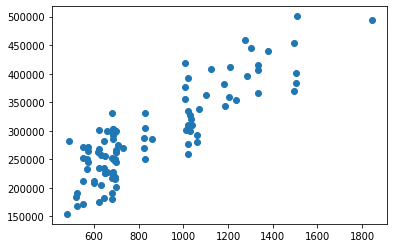

In [167]:
plt.scatter(df.x2,df.y)

## Fit the regression model

We can fit a linear regression model with `linear_model` of `scikit-learn` ([doc](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html))

In [168]:
# Importing the linear_model module from scikit-learn
from sklearn import linear_model

# Creating a linear regression model object
regr = linear_model.LinearRegression()

# Fitting the model to the data, where df is assumed to be a DataFrame
regr.fit(df[['x1', 'x2']], df.y)

# Printing the coefficients and intercept of the linear regression model
# coef_ contains the coefficients for each feature, and intercept_ contains the intercept
print(f"Coefficients = {regr.coef_}\nIntercept = {regr.intercept_ : .2f}")

Coefficients = [3040.35598079  228.35242603]
Intercept = -6021794.75


- The code imports the necessary `linear_model` module from scikit-learn.
- It creates a linear regression model using the `LinearRegression` class.
- The model is fitted to the data, where 'x1' and 'x2' are features, and 'y' is the target variable.
- The coefficients and intercept of the fitted model are then printed to the console.

This code provides insight into how the linear regression model represents the relationship between the features and the target variable in terms of coefficients and intercept.

We can compute the predicted values

In [169]:
# Using the fitted linear regression model to predict the target variable 'y' based on features 'x1' and 'x2'
y_fit = regr.predict(df[['x1', 'x2']])

we can add this value to the dataframe

In [170]:
df['y_fit']=y_fit

and visualize them

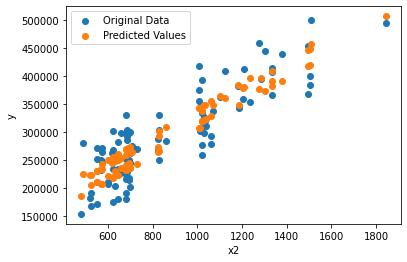

In [171]:
# Creating a scatter plot of the original data points (x2 vs y) with label 'Original Data'
plt.scatter(df.x2, df.y, label='Original Data')

# Overlaying the scatter plot with another set of points representing the predicted values (x2 vs y_fit) with label 'Predicted Values'
plt.scatter(df.x2, y_fit, label='Predicted Values')

# Adding labels to the axes
plt.xlabel('x2')
plt.ylabel('y')

# Adding a legend
plt.legend()

# Displaying the plot
plt.show()

- The code uses `plt.scatter` to create a scatter plot of the original data points where the x-axis is 'x2' and the y-axis is 'y'.
- It then overlays the same plot with another set of points representing the predicted values (`y_fit`) for each corresponding 'x2'.
- The `plt.show()` command is used to display the plot.

This visualization allows you to compare the original data points with the predicted values from the linear regression model for the feature 'x2'.

## Compute the residuals

We can compute the residuals, as follows

In [172]:
# Adding a new column 'res' to the DataFrame to store residuals
df['res'] = y_fit - df['y']

and visualize them

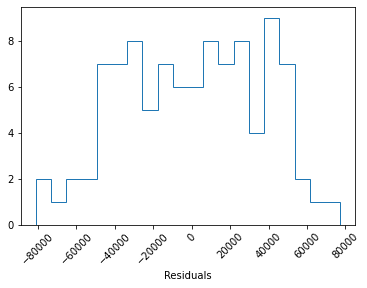

In [173]:
# Creating a histogram of the residuals in the DataFrame 'df' with 20 bins and 'step' type
_ = plt.hist(df['res'], bins=20, histtype='step')

# Adding a label to the x-axis
plt.xlabel('Residuals')

# Adjusting the tick frequency on the x-axis
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

- The `plt.hist` function is used to create a histogram.
- The `df['res']` column represents the residuals calculated by subtracting the actual values from the predicted values.
- The histogram is configured with 20 bins (`bins=20`) and a 'step' type.

This visualization provides insight into the distribution of residuals, which is useful for assessing the model's performance. Ideally, residuals should be centered around zero and exhibit a roughly normal distribution for a well-fitted model.

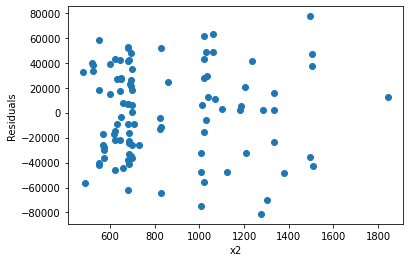

In [174]:
# Creating a scatter plot to visualize the relationship between 'x2' and the residuals in the DataFrame 'df'
plt.scatter(df['x2'], df['res'])

# Adding labels to the axes
plt.xlabel('x2')
plt.ylabel('Residuals')

# Displaying the plot
plt.show()

## Bootstrapping residual regression

The objective is to estimate the standard errors for a coefficient vector (`regr.coeff_` and `regr.intercept_`) in a linear regression by bootstrapping the residuals.



we can use the `pd.sample` function to generate a bootstrap resample of our residuals

In [175]:
res_boot = df.res.sample(frac=1,replace=True)

In [176]:
res_boot.head()

14   -69955.292715
78    -9483.902758
47    34837.510688
4    -81139.459637
16    22992.499156
Name: res, dtype: float64

According to the method of boostrapping the residuals, we need to add these residual to the df.y column. As we can see, the indices of the raws in the `res_boot` series, are the bootstrapped version of the indices. If we want to sum the residuals to the df.y column, we have to rename the raw indices of the `res_boot` series

In [181]:
res_boot.index

Int64Index([14, 78, 47,  4, 16, 97,  9, 22, 51, 34, 29, 75, 57, 75, 64, 66, 78,
             5, 32, 41, 59, 23, 88, 28, 46, 89, 46, 78, 56, 58, 90, 67, 85, 20,
            86, 51, 92, 51, 98, 25, 37, 36,  8, 60, 43, 45, 85, 33, 18, 17, 58,
            43, 84, 66, 38, 76, 95, 11, 89, 60, 71, 69, 48, 98, 44,  7, 46, 65,
            43, 68, 22, 44, 62, 18, 65, 91, 57, 72,  3, 40, 95, 62, 31, 92, 51,
            50, 59, 32, 19, 67, 39,  6, 76, 89, 41, 96, 69,  5, 19, 58],
           dtype='int64')

In [182]:
res_boot.index.value_counts()

51    4
58    3
43    3
89    3
46    3
     ..
37    1
36    1
8     1
45    1
96    1
Length: 66, dtype: int64

In [62]:
res_boot.index = range(res_boot.shape[0])
res_boot.head()

0   -22790.580120
1    -6131.782488
2    26245.129985
3    20154.358814
4     5595.147745
Name: res, dtype: float64

We can add at this point also the bootstrapped residuals to the dataframe

In [63]:
df['res_boot'] = res_boot

In [64]:
df.head()

,Data,x1,x2,y,y_fit,Res,res,res_boot
0,1,2015,643.09,234314.144,251373.708599,17059.564599,17059.564599,-22790.580120
1,2,2009,656.22,228581.528,236129.840068,7548.312068,7548.312068,-6131.782488
2,3,2018,487.29,281626.336,224917.468565,-56708.867435,-56708.867435,26245.129985
3,4,2015,1504.75,401255.608,448135.860013,46880.252013,46880.252013,20154.358814
4,5,2009,1275.46,458674.256,377534.796363,-81139.459637,-81139.459637,5595.147745


We can implement the estimate of the SE of the regression parameters by the bootstrap residual regression model as follows:

In [67]:
# Initializing empty lists to store bootstrapped coefficients and intercepts
coef1_boot, coef2_boot, intercept_boot, n_boots = [], [], [], 1000

# Looping through the specified number of bootstrap iterations
for i in range(n_boots):
    # Creating a bootstrap sample with replacement on the Res vector (residuals)
    res_boot = df.res.sample(frac=1, replace=True)
    
    # Renaming the row indices of the bootstrapped residuals
    res_boot.index = range(res_boot.shape[0])
    
    # Fitting the linear regression model to the original data with bootstrapped residuals
    regr.fit(df[['x1', 'x2']], df.y + res_boot)
    
    # Appending the estimated coefficients and intercept to the lists
    coef1_boot.append(regr.coef_[0])
    coef2_boot.append(regr.coef_[1])
    intercept_boot.append(regr.intercept_)


- The code initializes empty lists (`coef1_boot`, `coef2_boot`, `intercept_boot`) to store bootstrapped coefficients and intercepts.
- It loops through the specified number of bootstrap iterations (`n_boots`).
- In each iteration, it creates a bootstrap sample of residuals (`res_boot`) by sampling with replacement from the original residuals (`df.res`).
- The row indices of the bootstrapped residuals are then renamed.
- The linear regression model is fitted to the original data with the bootstrapped residuals.
- The estimated coefficients and intercept from the fitted model are appended to their respective lists.

This procedure allows you to estimate the distribution of coefficients and intercepts by fitting the linear regression model multiple times with different bootstrapped samples of residuals.

We can thus estimate the standard errors of the  coefficients:

In [69]:
# Calculating the standard errors for the bootstrapped coefficients and intercept
SE_coef1 = np.std(coef1_boot)
SE_coef2 = np.std(coef2_boot)
SE_intercept_boot = np.std(intercept_boot)

# Printing the standard errors
print(f"The SE are: \n for coef1 coefficient = {SE_coef1} \n for coef2 coefficient = {SE_coef2}  \n for the intercept = {SE_intercept_boot}")

The SE are: 
 for coef1 coefficient = 796.2491658381163 
 for coef2 coefficient = 12.214300049459334  
 for the intercept = 1604511.5415232275


The coefficients and intercept of the LinearRegression fit were:

In [70]:
regr.coef_, regr.intercept_

(array([3626.47901256,  220.23195409]), -7196228.025547708)

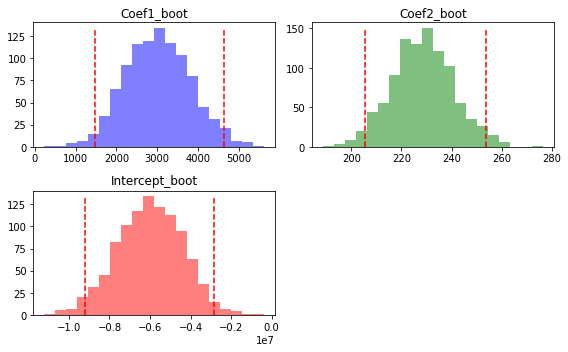

In [152]:
# Creating subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 5))

# Plotting on the first subplot
hist_plot1 = axes[0, 0].hist(coef1_boot, bins=20, color='blue', alpha=0.5)
axes[0, 0].set_title('Coef1_boot')
axes[0, 0].vlines(np.percentile(coef1_boot, [2.5, 97.5]), ymin=0, ymax=max(hist_plot1[0]), colors='red', linestyles='dashed')

# Plotting on the second subplot
hist_plot2 = axes[0, 1].hist(coef2_boot, bins=20, color='green', alpha=0.5)
axes[0, 1].set_title('Coef2_boot')
axes[0, 1].vlines(np.percentile(coef2_boot, [2.5, 97.5]), ymin=0, ymax=max(hist_plot2[0]), colors='red', linestyles='dashed')


# Plotting on the third subplot
hist_plot3 = axes[1, 0].hist(intercept_boot, bins=20, color='red', alpha=0.5)
axes[1, 0].set_title('Intercept_boot')
axes[1, 0].vlines(np.percentile(intercept_boot, [2.5, 97.5]), ymin=0, ymax=max(hist_plot3[0]), colors='red', linestyles='dashed')


# Removing the empty subplot in the last row and column
fig.delaxes(axes[1, 1])

# Adjusting layout
plt.tight_layout()

# Displaying the plot
plt.show()


In [75]:
# Calculating the 95% confidence intervals for the bootstrapped coefficients and intercept
CI_coef1 = np.percentile(coef1_boot, [2.5, 97.5])
CI_coef2 = np.percentile(coef2_boot, [2.5, 97.5])
CI_intercept = np.percentile(intercept_boot, [2.5, 97.5])

# Printing the 95% confidence intervals
print(f"The 95% CI are: \n for coef1 coefficient = {CI_coef1} \n for coef2 coefficient = {CI_coef2}  \n for the intercept = {CI_intercept}")

The 95% CI are: 
 for coef1 coefficient = [1462.16041205 4626.02130543] 
 for coef2 coefficient = [205.29606983 253.84472117]  
 for the intercept = [-9230026.02788064 -2853511.72169653]
